In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [32]:
# AI/AN -> American Indian/ Alska Native
# NHPI -> Native Hawaiian/ Pacific Islander

In [444]:
import os
import pandas as pd

path = r"Dataset/Race and ethinicity state data"

def read_cvs(path):
    f = [cvs_ for cvs_ in os.listdir(path) if cvs_.endswith('.csv')]  # fetching all csv files
    return f

files_ = read_cvs(path)
st = ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'dc', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']
st= [x.upper() for x in st]

st_copy = st.copy()

date_list = pd.DataFrame(data=pd.date_range(start='04-12-2020',end='03-07-2021'),columns=["Date"])

records = []
files_ = read_cvs(path)
for index_, js_ in enumerate(files_):
        with open(os.path.join(path, js_)) as file_:
            st_copy[index_] = pd.read_csv(file_)
            st_copy[index_] = st_copy[index_][::-1].reset_index().drop('index',axis=1)
            # st_copy[index_] = st_copy[index_].drop("Index")
            records.append(st_copy[index_])

data_records = dict(zip(st,records))
records_copy = data_records.copy()


In [445]:

def date_processing(state_list,data,date_range):
    """
    1) Converting the date in the standard format (mm-dd-yyyy).
    2) Filling up the missing dates in the dataset.
    """
    st_count=0
    for state in state_list:
        for i in range(len(data["AL"]["Date"])):
            #data_records[state].Date[i]=dt.strftime(pd.to_datetime(str(data_records[state].Date[i])[:4]+"-"+ str(data_records[state].Date[i])[4:6]+"-"+ str(data_records[state].Date[i])[6:],format="%Y-%m-%d").date(),format="%m-%d-%y") Do not use
            x_date = (str(data[state].Date[i])[:4],str(data[state].Date[i])[4:6],str(data[state].Date[i])[6:])
            x_date = "-".join(x_date)
            data[state].Date[i]=dt.strftime(pd.to_datetime(x_date).date(),format="%m-%d-%Y")
            data[state].Date[i]=pd.to_datetime(data[state].Date[i]).date()
        st_count +=1
        print(st_count)
        data[state].Date = data[state].Date.astype('datetime64[ns]')
        date_range=date_range.astype('datetime64[ns]')
        data[state]=pd.merge(date_range,data[state],on='Date',how='outer')  # Merging Dataset. 
        data[state].State.fillna(state,inplace=True)
        
# date_processing(st,data_records,date_list)

In [446]:
data_records["AL"][:96]

,State,Date,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_NHPI,Cases_Multiracial,Cases_LatinX,...,Tests_Black,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown,Tests_LatinX,Tests_Multiracial,Tests_NHPI,Tests_Other,Tests_White,Tests_Total
0,AL,20200412,37,NaN,1279,1657,66,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,20200415,41,NaN,1594,1996,85,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,20200419,45,NaN,1831,2300,102,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,20200422,42,NaN,1842,2296,110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,20200426,50,NaN,2411,2947,163,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,AL,20210221,2172,NaN,79834,154388,37418,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,AL,20210224,2224,NaN,81137,157043,37660,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,AL,20210228,2237,NaN,81782,158420,37809,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,AL,20210303,2248,NaN,82171,159154,37912,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
import pandas as pd
date_list = pd.DataFrame(data=pd.date_range(start='04-12-2020',end='03-07-2021'),columns=["Date"])  
for state in st:
    for i in range(len(records_copy["AL"]["Date"])):
        #data_records[state].Date[i]=dt.strftime(pd.to_datetime(str(data_records[state].Date[i])[:4]+"-"+ str(data_records[state].Date[i])[4:6]+"-"+ str(data_records[state].Date[i])[6:],format="%Y-%m-%d").date(),format="%m-%d-%y") Do not use
        x_date = (str(data_records[state].Date[i])[:4],str(data_records[state].Date[i])[4:6],str(data_records[state].Date[i])[6:])
        x_date = "-".join(x_date)
        data_records[state].Date[i]=dt.strftime(pd.to_datetime(x_date).date(),format="%m-%d-%Y")
        data_records[state].Date[i]=pd.to_datetime(data_records[state].Date[i]).date()
        
    data_records[state].Date = data_records[state].Date.astype('datetime64[ns]')
    date_list=date_list.astype('datetime64[ns]')
    data_records[state]=pd.merge(date_list,data_records[state],on='Date',how='outer')  # Merging Dataset. 
    data_records[state].State.fillna(state,inplace=True)


def race_data_processing(data=data_records,states=st,date_df=date_list):
    
    for state in states:
        for i in range(len(date_df)):
            data[state].iloc[:,2:8] = data[state].iloc[:,2:8].interpolate(method='polynomial',order=2).fillna(0).astype('int')  # interpolation
            data[state].iloc[:,2:8].fillna(0,inplace=True)
            data[state].iloc[:,2:8].astype('int')

            data[state]["Daily_Cases_Asian"]=( data[state]["Cases_Asian"]- data[state]["Cases_Asian"].shift(1)).rolling(14).mean() # number of new cases on that particular day. 
            data[state]["Daily_Cases_Black"]= (data[state]["Cases_Black"]- data[state]["Cases_Black"].shift(1)).rolling(14).mean() # number of new cases on that particular day. 
            data[state]["Daily_Cases_White"]= (data[state]["Cases_White"]- data[state]["Cases_White"].shift(1)).rolling(14).mean() # number of new cases on that particular day. 
            data[state]["Daily_Cases_Other"]= (data[state]["Cases_Other"]- data[state]["Cases_Other"].shift(1)).rolling(14).mean() # number of new cases on that particular day. 
            data[state]["Daily_Cases_AIAN"] = (data[state]["Cases_AIAN"] -  data[state]["Cases_AIAN"].shift(1)).rolling(14).mean()
            data[state]["Daily_Cases_NHPI"] = (data[state]["Cases_NHPI"] -  data[state]["Cases_NHPI"].shift(1)).rolling(14).mean()
            # data[state]["Daily_Cases_Mulltiracial"] = data[state]["Cases_Multiracial"] -  data[state]["Cases_Multiracial"].shift(1).rolling(7).mean()
            # data[state]["Daily_Cases_LatinX"] = data[state]["Cases_LatinX"] -  data[state]["Cases_LatinX"].shift(1).rolling(7).mean()
            # # data[state]["Daily_Cases_Ethnicity_NonHispanic"] = data[state]["Cases_Ethnicity_NonHispanic"] -  data[state]["Cases_Ethnicity_NonHispanic"].shift(1).rolling(7).mean()
            # # data[state]["Daily_Cases_Ethnicity_Hispanic"] = data[state]["Cases_Ethnicity_Hispanic"] -  data[state]["Cases_Ethnicity_Hispanic"].shift(1).rolling(7).mean()
            # # data[state]["Daily_Cases_Ethnicity_Unknown"] = data[state]["Cases_Ethnicity_Unknown"] -  data[state]["Cases_Ethnicity_Unknown"].shift(1).rolling(7).mean()


            # filling the null values in the Daily_cases_Race columns. Total 6 columns. 
            data[state].iloc[:,-6:] = data[state].iloc[:,-6:].interpolate(method='linear',limit_direction = 'backward').round() 

    
        
race_data_processing()   
        

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [448]:
data_records["AL"].iloc[:,-6:]

,Daily_Cases_Asian,Daily_Cases_Black,Daily_Cases_White,Daily_Cases_Other,Daily_Cases_AIAN,Daily_Cases_NHPI
0,1.0,81.0,92.0,7.0,0.0,0.0
1,1.0,81.0,92.0,7.0,0.0,0.0
2,1.0,81.0,92.0,7.0,0.0,0.0
3,1.0,81.0,92.0,7.0,0.0,0.0
4,1.0,81.0,92.0,7.0,0.0,0.0
...,...,...,...,...,...,...
325,5.0,167.0,340.0,35.0,0.0,0.0
326,6.0,178.0,361.0,37.0,0.0,0.0
327,7.0,196.0,397.0,40.0,0.0,0.0
328,7.0,211.0,425.0,42.0,0.0,0.0


In [468]:
data_records["AL"]["Daily_Cases_Black"][:270]

0        81.0
1        81.0
2        81.0
3        81.0
4        81.0
        ...  
265   -1564.0
266   -1671.0
267   -1181.0
268    -212.0
269     517.0
Name: Daily_Cases_Black, Length: 270, dtype: float64

In [507]:
st1 = ['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'dc', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy']
st_copy1 = st1.copy()
st_copy1 = [x.upper() for x in st_copy1]


In [469]:

def target_conse_5(data,target): 
    """
    data = ca_data.%change
    target = ca_data.target_conse_3
    
    Target Assigning 1 when we see drop in % change in 
    number of cases for 3 consecutive days.

    Problems: 1) for cal state we found on 4 1's. which is very 
    less when considered 3 consecutive day delays.
    2) 
    """
    for i in range(5,len(data)-1):
        if data[i]<data[i-1]:                   # 5 - 4th day
            if data[i-1] < data[i-2]:           # 4 - 3nd day
                if data[i-2] < data[i-3]:       # 3 - 2rd day
                    if data[i-3] < data[i-4]:   # 2 - 1st day
                        # if data[i+4] < data[i-5]:
                            # target[i] = 1
                            # target[i+1] = 1
                            # target[i+2] = 1
                        target[i] = 1
        
    target.fillna(0,inplace=True)

In [472]:
data_records["AL"]

,Date,State,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_NHPI,Cases_Multiracial,Cases_LatinX,...,Tests_NHPI,Tests_Other,Tests_White,Tests_Total,Daily_Cases_Asian,Daily_Cases_Black,Daily_Cases_White,Daily_Cases_Other,Daily_Cases_AIAN,Daily_Cases_NHPI
0,2020-04-12,AL,37,0,1279,1657,66,0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,81.0,92.0,7.0,0.0,0.0
1,2020-04-13,AL,38,0,1394,1775,72,0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,81.0,92.0,7.0,0.0,0.0
2,2020-04-14,AL,39,0,1499,1888,79,0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,81.0,92.0,7.0,0.0,0.0
3,2020-04-15,AL,41,0,1594,1996,85,0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,81.0,92.0,7.0,0.0,0.0
4,2020-04-16,AL,42,0,1677,2097,90,0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,81.0,92.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2021-03-03,AL,2248,0,82171,159154,37912,0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,167.0,340.0,35.0,0.0,0.0
326,2021-03-04,AL,2253,0,82316,159428,37940,0,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,178.0,361.0,37.0,0.0,0.0
327,2021-03-05,AL,2259,0,82467,159718,37964,0,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,196.0,397.0,40.0,0.0,0.0
328,2021-03-06,AL,2265,0,82625,160024,37984,0,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,211.0,425.0,42.0,0.0,0.0


In [478]:
for r in race:
    print(r)

Cases_Asian
Cases_AIAN
Cases_Black
Cases_White
Cases_Other
Cases_NHPI


In [509]:
race=data_records['AL'].columns[2:8]

for sts in st_copy1: # creating targe_racename variable in dataframe
   for r in race:
       data_records[sts]["target_" + f"{r.split('_')[-1]}"] = np.nan

for sts in st_copy1:
    for r in race:
        aa = "Daily_"+r
        data = data_records[sts][aa]
        rname = f"{r.split('_')[-1]}"
        target = data_records[sts]["target_" + rname]
        target_conse_5(data,target)
# how to can include below function for target variables
    
    

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [481]:
data_records["AL"].iloc[:,]["target_Black"].vali

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
325    0.0
326    0.0
327    0.0
328    0.0
329    0.0
Name: target_Black, Length: 330, dtype: float64

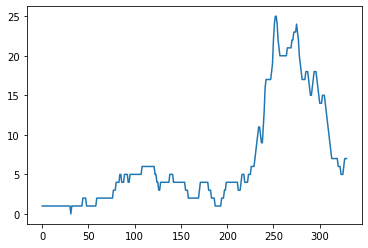

In [483]:
plt.plot(data_records["AL"]["Daily_Cases_Asian"][:])

In [484]:
data_records["AL"].columns

Index(['Date', 'State', 'Cases_Asian', 'Cases_AIAN', 'Cases_Black',
       'Cases_White', 'Cases_Other', 'Cases_NHPI', 'Cases_Multiracial',
       'Cases_LatinX', 'Cases_Ethnicity_NonHispanic',
       'Cases_Ethnicity_Hispanic', 'Cases_Ethnicity_Unknown', 'Cases_Total',
       'Deaths_AIAN', 'Deaths_Asian', 'Deaths_Black',
       'Deaths_Ethnicity_Hispanic', 'Deaths_Ethnicity_NonHispanic',
       'Deaths_Ethnicity_Unknown', 'Deaths_LatinX', 'Deaths_Multiracial',
       'Deaths_NHPI', 'Deaths_Other', 'Deaths_White', 'Deaths_Total',
       'Hospitalizations_AIAN', 'Hospitalizations_Asian',
       'Hospitalizations_Black', 'Hospitalizations_Ethnicity_Hispanic',
       'Hospitalizations_Ethnicity_NonHispanic',
       'Hospitalizations_Ethnicity_Unknown', 'Hospitalizations_LatinX',
       'Hospitalizations_Multiracial', 'Hospitalizations_NHPI',
       'Hospitalizations_Other', 'Hospitalizations_White',
       'Hospitalizations_Total', 'Tests_AIAN', 'Tests_Asian', 'Tests_Black',
       'Test

In [485]:
data_records["CA"]

,Date,State,Cases_Asian,Cases_AIAN,Cases_Black,Cases_White,Cases_Other,Cases_NHPI,Cases_Multiracial,Cases_LatinX,...,Daily_Cases_White,Daily_Cases_Other,Daily_Cases_AIAN,Daily_Cases_NHPI,target_Asian,target_AIAN,target_Black,target_White,target_Other,target_NHPI
0,2020-04-12,CA,1756,27,945,4323,1216,270,NaN,4729.0,...,244.0,43.0,2.0,-15.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-04-13,CA,1858,28,1000,4526,1215,320,NaN,NaN,...,244.0,43.0,2.0,-15.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-04-14,CA,1960,29,1055,4725,1233,335,NaN,NaN,...,244.0,43.0,2.0,-15.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-04-15,CA,2063,31,1111,4921,1270,317,317.0,5873.0,...,244.0,43.0,2.0,-15.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-04-16,CA,2165,32,1166,5112,1324,263,NaN,NaN,...,244.0,43.0,2.0,-15.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2021-03-03,CA,184765,8915,110115,541927,305557,15228,41858.0,1494376.0,...,1227.0,-126.0,25.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0
326,2021-03-04,CA,185153,8936,110340,542892,305371,15242,NaN,NaN,...,1192.0,-134.0,25.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0
327,2021-03-05,CA,185582,8962,110610,543997,305129,15256,NaN,NaN,...,1153.0,-140.0,24.0,22.0,1.0,0.0,1.0,1.0,1.0,0.0
328,2021-03-06,CA,186052,8991,110922,545243,304831,15269,NaN,NaN,...,1123.0,-150.0,24.0,21.0,1.0,0.0,1.0,1.0,1.0,0.0


In [510]:
target_data=data_records["AL"].iloc[::,-6:]
for ste in st_copy1[1:]:
    # temp = data_records[ste].iloc[::,-6:]
    target_data=target_data.append(data_records[ste].iloc[::,-6:],ignore_index=True)
    

In [511]:
len(st_copy1)

48

In [512]:
target_data=target_data.astype('int')

In [513]:
target_data

,target_Asian,target_AIAN,target_Black,target_White,target_Other,target_NHPI
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
15835,0,0,0,0,0,0
15836,0,0,0,0,0,0
15837,0,0,0,0,0,0
15838,0,0,0,0,0,0


In [515]:
# target_data.to_csv("race_taget_final_v1.csv")

# Calling Policy Data

In [516]:
# Call policy data
policy_data = pd.read_csv("State_combine_data_new_2.csv")
target_data=pd.read_csv("race_taget_final_v1.csv")
policy_data.drop(policy_data.columns[0],axis=1,inplace=True)
policy_data.drop(policy_data.columns[-2:],axis=1,inplace=True)
policy_data=policy_data.iloc[:,:6]
policy_data

,days,p2,p3,p4,p5,p6
0,1,0.0,0.000000,0.000000,0.000000,0.0
1,2,0.0,0.000000,0.000000,0.000000,0.0
2,3,0.0,0.000000,0.000000,0.000000,0.0
3,4,0.0,0.000000,0.000000,0.000000,0.0
4,5,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...
19675,406,0.0,0.023659,0.023659,0.473121,0.0
19676,407,0.0,0.023424,0.023424,0.468413,0.0
19677,408,0.0,0.023191,0.023191,0.463752,0.0
19678,409,0.0,0.022960,0.022960,0.459138,0.0


In [517]:
target_data = target_data.drop(columns=target_data.columns[0])
target_data

,target_Asian,target_AIAN,target_Black,target_White,target_Other,target_NHPI
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
15835,0,0,0,0,0,0
15836,0,0,0,0,0,0
15837,0,0,0,0,0,0
15838,0,0,0,0,0,0


In [519]:
target_data.target_Asian.value_counts()

0    14782
1     1058
Name: target_Asian, dtype: int64

In [520]:
target_data.target_Black.value_counts()


0    13375
1     2465
Name: target_Black, dtype: int64

In [521]:
target_data.target_White.value_counts()


0    12545
1     3295
Name: target_White, dtype: int64

In [523]:
target_data.target_AIAN.value_counts()


0    15329
1      511
Name: target_AIAN, dtype: int64

In [524]:
target_data.target_NHPI.value_counts()


0    15661
1      179
Name: target_NHPI, dtype: int64

In [541]:
policy_data[:410][:330]

,days,p2,p3,p4,p5,p6
0,1,0.000000,0.000000,0.000000,0.000,0.0
1,2,0.000000,0.000000,0.000000,0.000,0.0
2,3,0.000000,0.000000,0.000000,0.000,0.0
3,4,0.000000,0.000000,0.000000,0.000,0.0
4,5,0.000000,0.000000,0.000000,0.000,0.0
...,...,...,...,...,...,...
325,326,0.045732,0.046457,0.045732,0.582,0.0
326,327,0.045277,0.045995,0.045277,0.582,0.0
327,328,0.044826,0.045537,0.044826,0.582,0.0
328,329,0.044380,0.045084,0.044380,0.582,0.0


In [562]:
j=410
policy_data_update = policy_data[:410][:330]
for i in range(820,len(policy_data),410):
    policy_data_update=policy_data_update.append(policy_data[j:i][:330])
    j=i
    

In [568]:

policy_data_update=policy_data_update.append(policy_data[19270:][:330])

In [595]:
policy_data_update_copy=policy_data_update.copy()

In [604]:
policy_data_update_copy.reset_index(inplace=True)


In [609]:
# policy_data_update_copy.drop(policy_data_update_copy.index,inplace=True,axis=1)
policy_data_update_copy

,index,days,p2,p3,p4,p5,p6
0,0,1,0.0,0.000000,0.000000,0.000,0.0
1,1,2,0.0,0.000000,0.000000,0.000,0.0
2,2,3,0.0,0.000000,0.000000,0.000,0.0
3,3,4,0.0,0.000000,0.000000,0.000,0.0
4,4,5,0.0,0.000000,0.000000,0.000,0.0
...,...,...,...,...,...,...,...
15835,19595,326,0.0,0.052655,0.052655,0.638,0.0
15836,19596,327,0.0,0.052131,0.052131,0.638,0.0
15837,19597,328,0.0,0.051612,0.051612,0.638,0.0
15838,19598,329,0.0,0.051098,0.051098,0.638,0.0


In [583]:
target_data

,target_Asian,target_AIAN,target_Black,target_White,target_Other,target_NHPI
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
15835,0,0,0,0,0,0
15836,0,0,0,0,0,0
15837,0,0,0,0,0,0
15838,0,0,0,0,0,0


In [610]:
pd.concat([policy_data_update_copy,target_data],axis=1)

,index,days,p2,p3,p4,p5,p6,target_Asian,target_AIAN,target_Black,target_White,target_Other,target_NHPI
0,0,1,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
1,1,2,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
2,2,3,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
3,3,4,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
4,4,5,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,19595,326,0.0,0.052655,0.052655,0.638,0.0,0,0,0,0,0,0
15836,19596,327,0.0,0.052131,0.052131,0.638,0.0,0,0,0,0,0,0
15837,19597,328,0.0,0.051612,0.051612,0.638,0.0,0,0,0,0,0,0
15838,19598,329,0.0,0.051098,0.051098,0.638,0.0,0,0,0,0,0,0


In [611]:
final_race_data = pd.concat([policy_data_update_copy,target_data],axis=1)
final_race_data

,index,days,p2,p3,p4,p5,p6,target_Asian,target_AIAN,target_Black,target_White,target_Other,target_NHPI
0,0,1,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
1,1,2,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
2,2,3,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
3,3,4,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
4,4,5,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,19595,326,0.0,0.052655,0.052655,0.638,0.0,0,0,0,0,0,0
15836,19596,327,0.0,0.052131,0.052131,0.638,0.0,0,0,0,0,0,0
15837,19597,328,0.0,0.051612,0.051612,0.638,0.0,0,0,0,0,0,0
15838,19598,329,0.0,0.051098,0.051098,0.638,0.0,0,0,0,0,0,0


In [612]:
final_race_data=final_race_data.drop(["index","days"],axis=1)
final_race_data

,p2,p3,p4,p5,p6,target_Asian,target_AIAN,target_Black,target_White,target_Other,target_NHPI
0,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
1,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
2,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
3,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
4,0.0,0.000000,0.000000,0.000,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15835,0.0,0.052655,0.052655,0.638,0.0,0,0,0,0,0,0
15836,0.0,0.052131,0.052131,0.638,0.0,0,0,0,0,0,0
15837,0.0,0.051612,0.051612,0.638,0.0,0,0,0,0,0,0
15838,0.0,0.051098,0.051098,0.638,0.0,0,0,0,0,0,0


In [614]:
# final_race_data.to_csv("Combined_Final_Race_data.csv")

# RACES

## Race

In [615]:
positive_asian_data = final_race_data[final_race_data.target_Asian == 1]
negative_asian_data = final_race_data[final_race_data.target_Asian == 0]
len(positive_asian_data),len(negative_asian_data) # 2144

(1058, 14782)

In [669]:
positive_asian_data.iloc[:,:5]

,p2,p3,p4,p5,p6
257,0.090269,0.091701,0.090269,0.560,0.0
279,0.072442,0.073591,0.072442,0.648,0.0
280,0.071721,0.072859,0.071721,0.648,0.0
281,0.071008,0.072134,0.071008,0.648,0.0
300,0.058721,0.059652,0.058721,0.624,0.0
...,...,...,...,...,...
15495,0.052639,0.052639,0.051597,0.612,0.0
15496,0.052115,0.052115,0.051083,0.612,0.0
15501,0.049574,0.049574,0.048592,0.612,0.0
15502,0.049080,0.049080,0.048109,0.612,0.0


### Asian Model

In [618]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

In [619]:
import random
random.seed(0)

In [622]:
x_asian = positive_asian_data
x_asian_1200 = shuffle(negative_asian_data,random_state=0).sample(1200)
x_asian = x_asian.append(x_asian_1200,ignore_index=True)
x_asian = shuffle(x_asian,random_state=0)

X_asian = x_asian.iloc[:,:5]
y_asian = x_asian.target_Asian

x_asian_train,x_asian_test,y_asian_train,y_asian_test = train_test_split(X_asian,y_asian,test_size=0.3,random_state=0)


#### Logistic Model

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       368
           1       0.60      0.68      0.64       310

    accuracy                           0.64       678
   macro avg       0.65      0.65      0.64       678
weighted avg       0.65      0.64      0.65       678

[ 0.67313983 -3.1657798   0.65057251  0.78221745 -1.3022636 ]


Text(0.5, 1.0, ' LR Policy Impact')

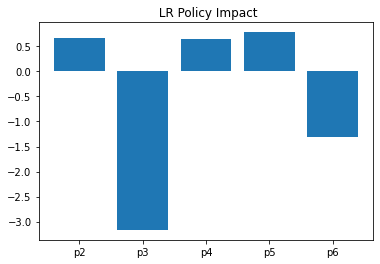

In [623]:
model_asian = LogisticRegression()
model_asian.fit(x_asian_train,y_asian_train)
model_asian_prob= model_asian.predict_proba(x_asian_test)
pred_asian_lr = model_asian.predict(x_asian_test)
cm = confusion_matrix(y_asian_test, pred_asian_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_asian_test, pred_asian_lr))

importance = model_asian.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

### Random Forest

In [624]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       368
           1       0.78      0.82      0.80       310

    accuracy                           0.81       678
   macro avg       0.81      0.81      0.81       678
weighted avg       0.82      0.81      0.81       678



Text(0.5, 1.0, 'RF Policy Impact')

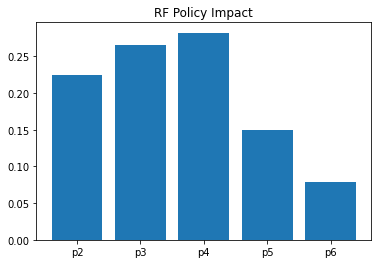

In [626]:
clf_asian = RandomForestClassifier(n_estimators = 300,max_depth=25,criterion='entropy',
            n_jobs=-1, oob_score=True,random_state = 0).fit(x_asian_train, y_asian_train)

y_pred_asian=clf_asian.predict(x_asian_test)
y_prob_asian = clf_asian.predict_proba(x_asian_test)
print(classification_report(y_asian_test, y_pred_asian))
plt.bar(x_asian.columns[:5],clf_asian.feature_importances_)
# plt.ylim(0.14)
plt.title("RF Policy Impact")

In [627]:
clf_asian.feature_importances_

array([0.22481158, 0.26507748, 0.28231575, 0.14957137, 0.07822382])

In [ ]:
clf_asian.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Gradient Boosting

In [628]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [630]:
gbc_asian = GradientBoostingClassifier(n_estimators=1000,max_depth=15,random_state=0)
gbc_asian.fit(x_asian_train,y_asian_train)
pred_gbc_asian= gbc_asian.predict(x_asian_test)


In [631]:
print(classification_report(y_asian_test,pred_gbc_asian))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       368
           1       0.79      0.79      0.79       310

    accuracy                           0.81       678
   macro avg       0.81      0.81      0.81       678
weighted avg       0.81      0.81      0.81       678



Text(0.5, 1.0, 'GBC Policy Impact')

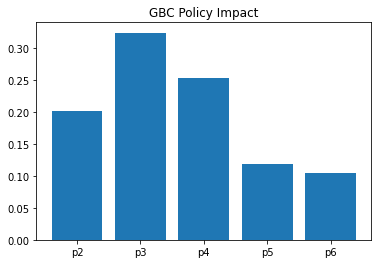

In [632]:

plt.bar(x_asian.columns[:5],gbc_asian.feature_importances_)
# plt.ylim(0.14)
plt.title("GBC Policy Impact")

In [ ]:
gbc_asian.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### BLACK RACE

In [633]:
positive_black_data = final_race_data[final_race_data.target_Black == 1]
negative_black_data = final_race_data[final_race_data.target_Black == 0]

In [634]:
len(positive_black_data),len(negative_black_data) # 

(2465, 13375)

In [635]:
x_black = positive_black_data
x_black_2565 = shuffle(negative_black_data,random_state=0).sample(2565)
x_black = x_black.append(x_black_2565,ignore_index=True)
x_black = shuffle(x_black,random_state=0)

X_black = x_black.iloc[:,:5]
y_black = x_black.target_Black

x_black_train,x_black_test,y_black_train,y_black_test = train_test_split(X_black,y_black,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       744
           1       0.59      0.54      0.57       765

    accuracy                           0.58      1509
   macro avg       0.58      0.58      0.58      1509
weighted avg       0.58      0.58      0.58      1509

[ 0.65299522 -1.81470557  1.29307555  1.01895372 -0.76114082]


Text(0.5, 1.0, ' LR Policy Impact')

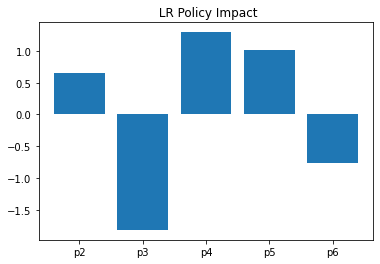

In [636]:
model_black = LogisticRegression()
model_black.fit(x_black_train,y_black_train)
model_black_prob= model_black.predict_proba(x_black_test)
pred_black_lr = model_black.predict(x_black_test)
cm = confusion_matrix(y_black_test, pred_black_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_black_test, pred_black_lr))

importance = model_black.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       744
           1       0.78      0.79      0.78       765

    accuracy                           0.78      1509
   macro avg       0.78      0.78      0.78      1509
weighted avg       0.78      0.78      0.78      1509



Text(0.5, 1.0, 'RF Policy Impact')

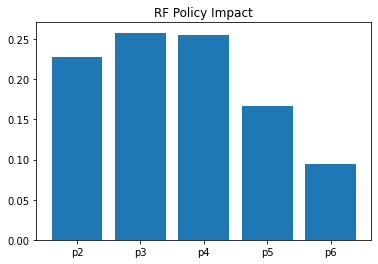

In [638]:
clf_black = RandomForestClassifier(n_estimators = 300,max_depth=25,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_black_train, y_black_train)

y_pred_black=clf_black.predict(x_black_test)
y_prob_black = clf_black.predict_proba(x_black_test)
print(classification_report(y_black_test, y_pred_black))
plt.bar(x_asian.columns[:5],clf_black.feature_importances_)
# plt.ylim(0.14)
plt.title("RF Policy Impact")

#### GB

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       744
           1       0.79      0.78      0.79       765

    accuracy                           0.79      1509
   macro avg       0.79      0.79      0.79      1509
weighted avg       0.79      0.79      0.79      1509



Text(0.5, 1.0, 'GBC Policy Impact')

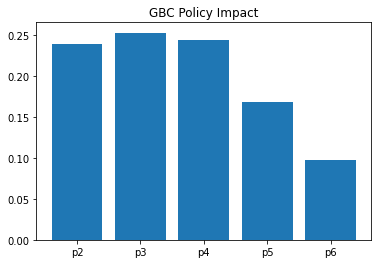

In [639]:
gbc_black = GradientBoostingClassifier(n_estimators=1000,max_depth=15,random_state=0)
gbc_black.fit(x_black_train,y_black_train)
pred_gbc_black= gbc_black.predict(x_black_test)
print(classification_report(y_black_test,pred_gbc_black))
plt.bar(x_asian.columns[:5],gbc_black.feature_importances_)
# plt.ylim(0.14)
plt.title("GBC Policy Impact")

### White RAce

In [640]:
positive_white_data = final_race_data[final_race_data.target_White == 1]
negative_white_data = final_race_data[final_race_data.target_White == 0]
len(positive_white_data),len(negative_white_data) # 2144

(3295, 12545)

In [641]:
x_white = positive_white_data
x_white_3400 = shuffle(negative_white_data,random_state=0).sample(3400)
x_white = x_white.append(x_white_3400,ignore_index=True)
x_white = shuffle(x_white,random_state=0)

X_white = x_white.iloc[:,:5]
y_white = x_white.target_White

x_white_train,x_white_test,y_white_train,y_white_test = train_test_split(X_white,y_white,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.63      0.50      0.56      1016
           1       0.58      0.69      0.63       993

    accuracy                           0.60      2009
   macro avg       0.60      0.60      0.59      2009
weighted avg       0.60      0.60      0.59      2009

[ 0.9471     -3.118467    0.82161728  0.59800931 -0.64780646]


Text(0.5, 1.0, ' LR Policy Impact')

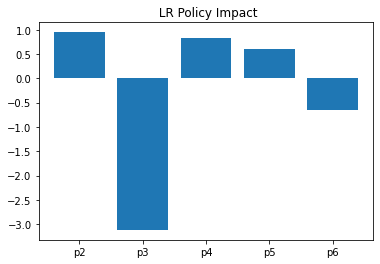

In [642]:
model_white = LogisticRegression()
model_white.fit(x_white_train,y_white_train)
model_white_prob= model_white.predict_proba(x_white_test)
pred_white_lr = model_white.predict(x_white_test)
cm = confusion_matrix(y_white_test, pred_white_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_white_test, pred_white_lr))

importance = model_white.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1016
           1       0.81      0.82      0.82       993

    accuracy                           0.82      2009
   macro avg       0.82      0.82      0.82      2009
weighted avg       0.82      0.82      0.82      2009



Text(0.5, 1.0, 'RF White Policy Impact')

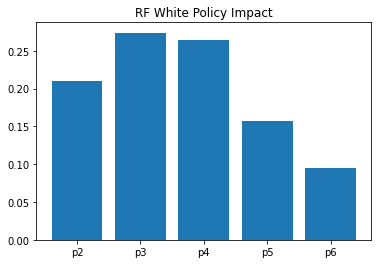

In [643]:
clf_white = RandomForestClassifier(n_estimators =300,max_depth=25,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_white_train, y_white_train)

y_pred_white=clf_white.predict(x_white_test)
y_prob_white = clf_white.predict_proba(x_white_test)
print(classification_report(y_white_test, y_pred_white))
plt.bar(x_asian.columns[:5],clf_white.feature_importances_)
# plt.ylim(0.14)
plt.title("RF White Policy Impact")

#### GB

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1016
           1       0.81      0.83      0.82       993

    accuracy                           0.82      2009
   macro avg       0.82      0.82      0.82      2009
weighted avg       0.82      0.82      0.82      2009



Text(0.5, 1.0, 'GBC Policy Impact')

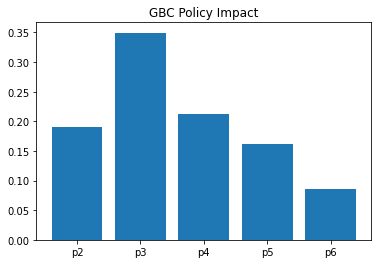

In [644]:
gbc_white = GradientBoostingClassifier(n_estimators=1000,max_depth=15,random_state=0)
gbc_white.fit(x_white_train,y_white_train)
pred_gbc_white= gbc_white.predict(x_white_test)
print(classification_report(y_white_test,pred_gbc_white))
plt.bar(x_asian.columns[:5],gbc_white.feature_importances_)
# plt.ylim(0.14)
plt.title("GBC Policy Impact")

### NHPI

In [645]:
positive_nhpi_data = final_race_data[final_race_data.target_NHPI == 1]
negative_nhpi_data = final_race_data[final_race_data.target_NHPI == 0]
len(positive_nhpi_data),len(negative_nhpi_data) # 

(179, 15661)

In [646]:
x_nhpi = positive_nhpi_data
x_nhpi_279 = shuffle(negative_nhpi_data,random_state=0).sample(279)
x_nhpi = x_nhpi.append(x_nhpi_279,ignore_index=True)
x_nhpi = shuffle(x_nhpi,random_state=0)

X_nhpi = x_nhpi.iloc[:,:5]
y_nhpi = x_nhpi.target_NHPI

x_nhpi_train,x_nhpi_test,y_nhpi_train,y_nhpi_test = train_test_split(X_nhpi,y_nhpi,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        92
           1       0.62      0.43      0.51        46

    accuracy                           0.72       138
   macro avg       0.69      0.65      0.66       138
weighted avg       0.71      0.72      0.71       138

[ 1.26914898 -0.34225318 -3.59742798 -0.86303041 -1.04244674]


Text(0.5, 1.0, ' LR NHPI Policy Impact')

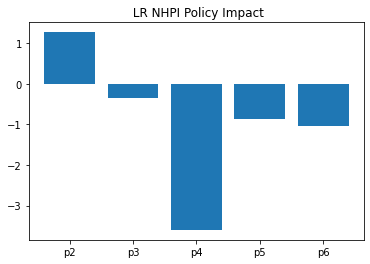

In [648]:
model_nhpi = LogisticRegression()
model_nhpi.fit(x_nhpi_train,y_nhpi_train)
model_nhpi_prob= model_nhpi.predict_proba(x_nhpi_test)
pred_nhpi_lr = model_nhpi.predict(x_nhpi_test)
cm = confusion_matrix(y_nhpi_test, pred_nhpi_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_nhpi_test, pred_nhpi_lr))

importance = model_nhpi.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR NHPI Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        92
           1       0.81      0.96      0.88        46

    accuracy                           0.91       138
   macro avg       0.90      0.92      0.91       138
weighted avg       0.92      0.91      0.91       138



Text(0.5, 1.0, 'RF Policy Impact')

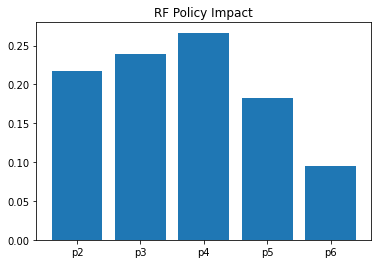

In [649]:
clf_nhpi = RandomForestClassifier(n_estimators = 300,max_depth=25,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_nhpi_train, y_nhpi_train)

y_pred_nhpi=clf_nhpi.predict(x_nhpi_test)
y_prob_nhpi = clf_nhpi.predict_proba(x_nhpi_test)
print(classification_report(y_nhpi_test, y_pred_nhpi))
plt.bar(x_asian.columns[:5],clf_nhpi.feature_importances_)
# plt.ylim(0.14)
plt.title("RF Policy Impact")

#### GB

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        92
           1       0.78      0.87      0.82        46

    accuracy                           0.88       138
   macro avg       0.86      0.88      0.86       138
weighted avg       0.88      0.88      0.88       138



Text(0.5, 1.0, 'GBC NHPI Policy Impact')

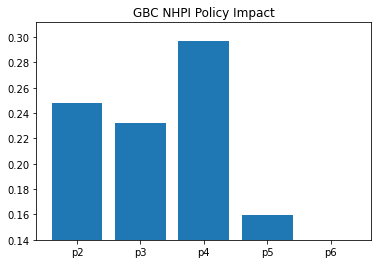

In [650]:
gbc_nhpi = GradientBoostingClassifier(n_estimators=1000,max_depth=15,random_state=0)
gbc_nhpi.fit(x_nhpi_train,y_nhpi_train)
pred_gbc_nhpi= gbc_nhpi.predict(x_nhpi_test)
print(classification_report(y_nhpi_test,pred_gbc_nhpi))
plt.bar(x_asian.columns[:5],gbc_nhpi.feature_importances_)
plt.ylim(0.14)
plt.title("GBC NHPI Policy Impact")

In [ ]:
gbc_nhpi.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### AIAN

In [651]:
positive_aian_data = final_race_data[final_race_data.target_AIAN == 1]
negative_aian_data = final_race_data[final_race_data.target_AIAN == 0]
len(positive_aian_data),len(negative_aian_data) # 2144

(511, 15329)

In [652]:
x_aian = positive_aian_data
x_aian_611 = shuffle(negative_aian_data,random_state=0).sample(611)
x_aian = x_aian.append(x_aian_611,ignore_index=True)
x_aian = shuffle(x_aian)

X_aian = x_aian.iloc[:,:5]
y_aian = x_aian.target_AIAN

x_aian_train,x_aian_test,y_aian_train,y_aian_test = train_test_split(X_aian,y_aian,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       166
           1       0.67      0.63      0.65       171

    accuracy                           0.65       337
   macro avg       0.65      0.65      0.65       337
weighted avg       0.65      0.65      0.65       337

[ 1.74085635 -3.49553719 -0.93956096  0.31962464 -0.70148895]


Text(0.5, 1.0, ' LR Policy Impact')

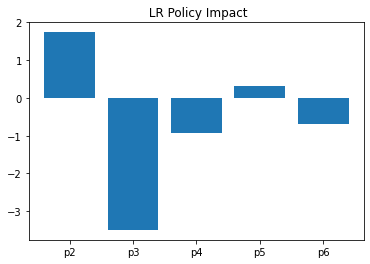

In [653]:
model_aian = LogisticRegression()
model_aian.fit(x_aian_train,y_aian_train)
model_aian_prob= model_aian.predict_proba(x_aian_test)
pred_aian_lr = model_aian.predict(x_aian_test)
cm = confusion_matrix(y_aian_test, pred_aian_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_aian_test, pred_aian_lr))

importance = model_aian.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       166
           1       0.91      0.89      0.90       171

    accuracy                           0.90       337
   macro avg       0.90      0.90      0.90       337
weighted avg       0.90      0.90      0.90       337



Text(0.5, 1.0, 'RF Policy Impact')

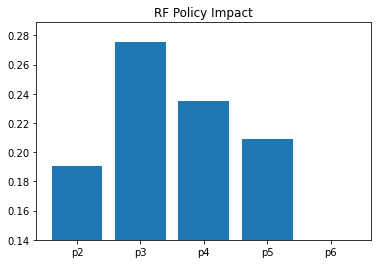

In [654]:
clf_aian = RandomForestClassifier(n_estimators =300,max_depth=25,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_aian_train, y_aian_train)

y_pred_aian=clf_aian.predict(x_aian_test)
y_prob_aian = clf_aian.predict_proba(x_aian_test)
print(classification_report(y_aian_test, y_pred_aian))
plt.bar(x_asian.columns[:5],clf_aian.feature_importances_)
plt.ylim(0.14)
plt.title("RF Policy Impact")

### GB

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       166
           1       0.91      0.86      0.88       171

    accuracy                           0.88       337
   macro avg       0.89      0.88      0.88       337
weighted avg       0.89      0.88      0.88       337



Text(0.5, 1.0, 'GBC Policy Impact')

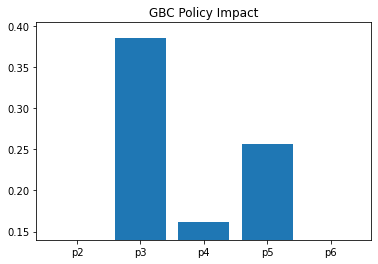

In [655]:
gbc_aian = GradientBoostingClassifier(n_estimators=1000,max_depth=15,random_state=0)
gbc_aian.fit(x_aian_train,y_aian_train)
pred_gbc_aian= gbc_aian.predict(x_aian_test)
print(classification_report(y_aian_test,pred_gbc_aian))
plt.bar(x_asian.columns[:5],gbc_aian.feature_importances_)
plt.ylim(0.14)
plt.title("GBC Policy Impact")

#### Other

In [656]:
positive_other_data = final_race_data[final_race_data.target_Other == 1]
negative_other_data = final_race_data[final_race_data.target_Other == 0]
len(positive_other_data),len(negative_white_data) # 2144

(2111, 12545)

In [657]:
x_other = positive_other_data
x_other_2211 = shuffle(negative_other_data,random_state=0).sample(2211)
x_other = x_other.append(x_other_2211,ignore_index=True)
x_other = shuffle(x_other,random_state=0)

X_other = x_other.iloc[:,:5]
y_other = x_other.target_Other

x_other_train,x_other_test,y_other_train,y_other_test = train_test_split(X_other,y_other,test_size=0.3,random_state=0)

#### LR

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       676
           1       0.59      0.65      0.62       621

    accuracy                           0.61      1297
   macro avg       0.61      0.61      0.61      1297
weighted avg       0.62      0.61      0.61      1297

[ 1.285828   -1.86198628 -0.89787141  0.61256364 -0.91585989]


Text(0.5, 1.0, ' LR Policy Impact')

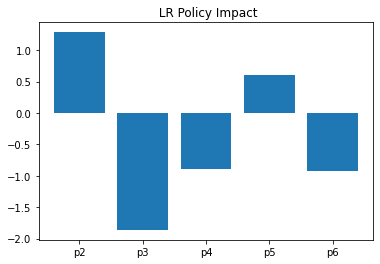

In [658]:
model_other = LogisticRegression()
model_other.fit(x_other_train,y_other_train)
model_other_prob= model_other.predict_proba(x_other_test)
pred_other_lr = model_other.predict(x_other_test)
cm = confusion_matrix(y_other_test, pred_other_lr)

# fig, ax = plt.subplots()
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
    # for j in range(2):
        # ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

print(classification_report(y_other_test, pred_other_lr))

importance = model_other.coef_[0]
print(importance)

plt.bar([x for x in x_asian.columns[:5]],importance)
# plt.ylim().
plt.title(" LR Policy Impact")

#### SVC

              precision    recall  f1-score   support

           0       0.56      0.30      0.39       786
           1       0.52      0.76      0.62       785

    accuracy                           0.53      1571
   macro avg       0.54      0.53      0.50      1571
weighted avg       0.54      0.53      0.50      1571



Text(0.5, 1.0, ' SVC other Policy Impact')

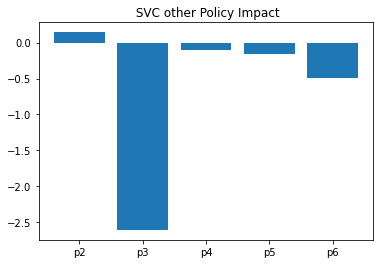

In [ ]:
model_other_svc = svm.SVC(kernel='linear')
model_other_svc.fit(x_other_train,y_other_train)
other_svc_pred = model_other_svc.predict(x_other_test)
print(classification_report(y_other_test,other_svc_pred))

plt.bar([x for x in x_asian.columns[:5]],model_other_svc.coef_[0])
# plt.ylim().
plt.title(" SVC other Policy Impact")

#### RF

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       676
           1       0.79      0.85      0.81       621

    accuracy                           0.82      1297
   macro avg       0.82      0.82      0.82      1297
weighted avg       0.82      0.82      0.82      1297



Text(0.5, 1.0, 'RF other Policy Impact')

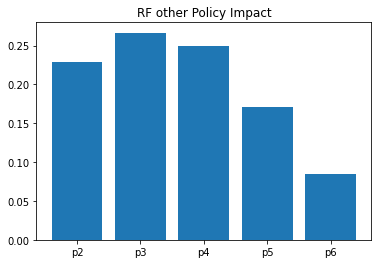

In [659]:
clf_other = RandomForestClassifier(n_estimators = 1000,max_depth=25,criterion='entropy',
n_jobs=-1, oob_score=True,random_state = 0).fit(x_other_train, y_other_train)

y_pred_other=clf_other.predict(x_other_test)
y_prob_other = clf_other.predict_proba(x_other_test)
print(classification_report(y_other_test, y_pred_other))
plt.bar(x_asian.columns[:5],clf_other.feature_importances_)
# plt.ylim(0.14)
plt.title("RF other Policy Impact")

#### GB

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       676
           1       0.78      0.84      0.81       621

    accuracy                           0.81      1297
   macro avg       0.81      0.81      0.81      1297
weighted avg       0.81      0.81      0.81      1297



Text(0.5, 1.0, 'GBC Policy Impact')

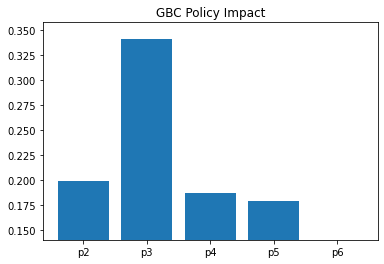

In [660]:
gbc_other = GradientBoostingClassifier(n_estimators=1000,max_depth=15,random_state=0)
gbc_other.fit(x_other_train,y_other_train)
pred_gbc_other= gbc_other.predict(x_other_test)
print(classification_report(y_other_test,pred_gbc_other))
plt.bar(x_asian.columns[:5],gbc_other.feature_importances_)
plt.ylim(0.14)
plt.title("GBC Policy Impact")

# Comparing ALL RACES

In [7]:
policy=["Stay_Home",'Cls_Rest',"Cls_Buss.","FaceMask",'Trav_Quar_Ban']
fig, ax = plt.subplots(6,2,figsize=(15,25))
fig.suptitle("Policy Impact on All Races",fontsize=20)
# fig.subplots_adjust(top=2)
# fig.text(x=-10,y=10,s=labels)
# fig.legend(labels,'center')
# fig.text(0,1,[x for x in labels],horizontalalignment='center', verticalalignment='center')
# ax[0,0].set_title('Random Forest',fontsize=15)
# ax[0,1].set_title("Gradient Boosting",fontsize=15)
fig.supylabel("Policy Impact",fontsize=25)
fig.supxlabel("Policies",fontsize=25)
# ax[0,2].set_title("Linear SVC")
# ax[0,3].set_title("Logistic Regression")
ax[0,0].set_ylabel("Asian",fontsize=20)
ax[1,0].set_ylabel("White",fontsize=20)
ax[2,0].set_ylabel("Black",fontsize=20)
ax[3,0].set_ylabel("NHPI",fontsize=20)
ax[4,0].set_ylabel("AIAN",fontsize=20)
ax[5,0].set_ylabel("Other",fontsize=20)

ax[0,0].set_xlabel("Policies",fontsize=15)
ax[1,0].set_xlabel("Policies",fontsize=15)
ax[2,0].set_xlabel("Policies",fontsize=15)
ax[3,0].set_xlabel("Policies",fontsize=15)
ax[4,0].set_xlabel("Policies",fontsize=15)
ax[5,0].set_xlabel("Policies",fontsize=15)

ax[0,1].set_xlabel("Policies",fontsize=15)
ax[1,1].set_xlabel("Policies",fontsize=15)
ax[2,1].set_xlabel("Policies",fontsize=15)
ax[3,1].set_xlabel("Policies",fontsize=15)
ax[4,1].set_xlabel("Policies",fontsize=15)
ax[5,1].set_xlabel("Policies",fontsize=15)

ax[0,0].set_title('Random Forest',fontsize=15)
ax[1,0].set_title('Random Forest',fontsize=15)
ax[2,0].set_title('Random Forest',fontsize=15)
ax[3,0].set_title('Random Forest',fontsize=15)
ax[4,0].set_title('Random Forest',fontsize=15)
ax[5,0].set_title('Random Forest',fontsize=15)

ax[0,1].set_title("Gradient Boosting",fontsize=15)
ax[1,1].set_title("Gradient Boosting",fontsize=15)
ax[2,1].set_title("Gradient Boosting",fontsize=15)
ax[3,1].set_title("Gradient Boosting",fontsize=15)
ax[4,1].set_title("Gradient Boosting",fontsize=15)
ax[5,1].set_title("Gradient Boosting",fontsize=15)

# ASIAN
a00=ax[0,0].bar(policy,clf_asian.feature_importances_,color = ['gray' if (x != max(clf_asian.feature_importances_)) else 'red' for x in clf_asian.feature_importances_]) # RF
ax[0,0].bar_label(a00)
# ax[0,0].set_ylim(0.14)
a01=ax[0,1].bar(policy,gbc_asian.feature_importances_,color = ['gray' if (x != max(gbc_asian.feature_importances_)) else 'red' for x in gbc_asian.feature_importances_])
ax[0,1].bar_label(a01)
# ax[0,1].set_ylim(0.14)
# ax[0,2].bar([x for x in policy],model_asian_svc.coef_[0])  # SVC
# ax[0,3].bar([x for x in policy],model_asian.coef_[0])    # Logistic Regression

# White
a10=ax[1,0].bar(policy,clf_white.feature_importances_,color = ['gray' if (x != max(clf_white.feature_importances_)) else 'red' for x in clf_white.feature_importances_])
ax[1,0].bar_label(a10)
# ax[1,0].set_ylim(0.14)
a11=ax[1,1].bar(policy,gbc_white.feature_importances_,color = ['gray' if (x != max(gbc_white.feature_importances_)) else 'red' for x in gbc_white.feature_importances_])
ax[1,1].bar_label(a11)
# ax[1,1].set_ylim(0.14)
# ax[1,2].bar([x for x in policy],model_white_svc.coef_[0])
# ax[1,3].bar([x for x in policy],model_white.coef_[0])

# BLACK
a20=ax[2,0].bar(policy,clf_black.feature_importances_,color = ['gray' if (x != max(clf_black.feature_importances_)) else 'red' for x in clf_black.feature_importances_])
ax[2,0].bar_label(a20)
# ax[2,0].set_ylim(0.14)
a21=ax[2,1].bar(policy,gbc_black.feature_importances_,color = ['gray' if (x != max(gbc_black.feature_importances_)) else 'red' for x in gbc_black.feature_importances_])
ax[2,1].bar_label(a21)
# ax[2,1].set_ylim(0.14)

# ax[2,2].bar([x for x in policy],model_black_svc.coef_[0])
# ax[2,3].bar([x for x in policy],model_black.coef_[0])

# NHPI
a30=ax[3,0].bar(policy,clf_nhpi.feature_importances_,color = ['gray' if (x != max(clf_nhpi.feature_importances_)) else 'red' for x in clf_nhpi.feature_importances_])
ax[3,0].bar_label(a30)
# ax[3,0].set_ylim(0.14)
a31=ax[3,1].bar(policy,gbc_nhpi.feature_importances_,color = ['gray' if (x != max(gbc_nhpi.feature_importances_)) else 'red' for x in gbc_nhpi.feature_importances_])
ax[3,1].bar_label(a31)
# ax[3,1].set_ylim(0.14)

# ax[3,2].bar([x for x in policy],model_nhpi_svc.coef_[0])
# ax[3,3].bar([x for x in policy],model_nhpi.coef_[0])

# AIAN
a40=ax[4,0].bar(policy,clf_aian.feature_importances_,color = ['gray' if (x != max(clf_aian.feature_importances_)) else 'red' for x in clf_aian.feature_importances_])
ax[4,0].bar_label(a40)
# ax[4,0].set_ylim(0.14)
a41=ax[4,1].bar(policy,gbc_aian.feature_importances_,color = ['gray' if (x != max(gbc_aian.feature_importances_)) else 'red' for x in gbc_aian.feature_importances_])
ax[4,1].bar_label(a41)
# ax[4,1].set_ylim(0.14)

# ax[4,2].bar([x for x in policy],model_aian_svc.coef_[0])
# ax[4,3].bar([x for x in policy],model_aian.coef_[0])

# Other
a50=ax[5,0].bar(policy,clf_other.feature_importances_,color = ['gray' if (x != max(clf_other.feature_importances_)) else 'red' for x in clf_other.feature_importances_])
ax[5,0].bar_label(a50)
# ax[5,0].set_ylim(0.14)
ax[5,1].bar_label(ax[5,1].bar(policy,gbc_other.feature_importances_,color = ['gray' if (x != max(gbc_other.feature_importances_)) else 'red' for x in gbc_other.feature_importances_]), width=0.2)
# ax[5,1].set_ylim(0.14)

# ax[5,2].bar([x for x in policy],model_other_svc.coef_[0])
# ax[5,3].bar([x for x in policy],model_other.coef_[0])
# for i, v in enumerate(gbc_other.feature_importances_):
    # ax[5,1].text(v+0.3,i+0.3,str(v.round(3)),fontweight='bold')
    
labels = {"p2" : "Stay-At-Home/Shelter-In-Place",
          "p3" : "Closing Restaurants",
          "p4" : "Closing Business overnight",
          "p5" : "Face Mask Mandate",
          "p6" : "Inter-State Quarantine Travel"}



# fig.legend(["p2","p3","p4","p5","p6"],labels=labels.values(),loc="upper center")
# fig.add_artist(matplotlib.offsetbox.AnchoredText(labels))
           
fig.tight_layout(pad=2)

NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':12})

fig, ax = plt.subplots(6,2,figsize=(10,20))
fig.suptitle("Policy Impact on All Races",fontsize=20,weight='bold')
fig.subplots_adjust(top=1)
# fig.text(x=-10,y=10,s=labels)
# fig.legend(labels,'center')
# fig.text(0,1,[x for x in labels],horizontalalignment='center', verticalalignment='center')
# ax[0,0].set_title('Random Forest',fontsize=15)
# ax[0,1].set_title("Gradient Boosting",fontsize=15)
fig.supylabel("Policy Impact",fontsize=25,weight='bold')
fig.supxlabel("Policies",fontsize=25,weight='bold')
# ax[0,2].set_title("Linear SVC")
# ax[0,3].set_title("Logistic Regression")
ax[0,0].set_ylabel("Asian",fontsize=20,weight='bold')
ax[1,0].set_ylabel("White",fontsize=20,weight='bold')
ax[2,0].set_ylabel("Black",fontsize=20,weight='bold')
ax[3,0].set_ylabel("NHPI",fontsize=20,weight='bold')
ax[4,0].set_ylabel("AIAN",fontsize=20,weight='bold')
ax[5,0].set_ylabel("Other",fontsize=20,weight='bold')

ax[0,0].set_xlabel("Policies",fontsize=15,weight='bold')
ax[1,0].set_xlabel("Policies",fontsize=15,weight='bold')
ax[2,0].set_xlabel("Policies",fontsize=15,weight='bold')
ax[3,0].set_xlabel("Policies",fontsize=15,weight='bold')
ax[4,0].set_xlabel("Policies",fontsize=15,weight='bold')
ax[5,0].set_xlabel("Policies",fontsize=15,weight='bold')

ax[0,1].set_xlabel("Policies",fontsize=15,weight='bold')
ax[1,1].set_xlabel("Policies",fontsize=15,weight='bold')
ax[2,1].set_xlabel("Policies",fontsize=15,weight='bold')
ax[3,1].set_xlabel("Policies",fontsize=15,weight='bold')
ax[4,1].set_xlabel("Policies",fontsize=15,weight='bold')
ax[5,1].set_xlabel("Policies",fontsize=15,weight='bold')

ax[0,0].set_title('Random Forest',fontsize=15,weight='bold')
ax[1,0].set_title('Random Forest',fontsize=15,weight='bold')
ax[2,0].set_title('Random Forest',fontsize=15,weight='bold')
ax[3,0].set_title('Random Forest',fontsize=15,weight='bold')
ax[4,0].set_title('Random Forest',fontsize=15,weight='bold')
ax[5,0].set_title('Random Forest',fontsize=15,weight='bold')

ax[0,1].set_title("Gradient Boosting",fontsize=15,weight='bold')
ax[1,1].set_title("Gradient Boosting",fontsize=15,weight='bold')
ax[2,1].set_title("Gradient Boosting",fontsize=15,weight='bold')
ax[3,1].set_title("Gradient Boosting",fontsize=15,weight='bold')
ax[4,1].set_title("Gradient Boosting",fontsize=15,weight='bold')
ax[5,1].set_title("Gradient Boosting",fontsize=15,weight='bold')

# ASIAN
a00=ax[0,0].bar(policy,asians_rf,color = ['gray' if (x != max(asians_rf)) else 'red' for x in asians_rf]) # RF
ax[0,0].bar_label(a00)
ax[0,0].set_ylim(0.15)
a01=ax[0,1].bar(policy,asians_gb,color = ['gray' if (x != max(asians_gb)) else 'red' for x in asians_gb])
ax[0,1].set_ylim(0.15)
ax[0,1].bar_label(a01)
# ax[0,2].bar([x for x in policy],model_asian_svc.coef_[0])  # SVC
# ax[0,3].bar([x for x in policy],model_asian.coef_[0])    # Logistic Regression

# White
a10=ax[1,0].bar(policy,white_rf,color = ['gray' if (x != max(white_rf)) else 'red' for x in white_rf])
ax[1,0].bar_label(a10)
ax[1,0].set_ylim(0.15)
a11=ax[1,1].bar(policy,white_gb,color = ['gray' if (x != max(white_gb)) else 'red' for x in white_gb])
ax[1,1].bar_label(a11)
ax[1,1].set_ylim(0.15)
# ax[1,2].bar([x for x in policy],model_white_svc.coef_[0])
# ax[1,3].bar([x for x in policy],model_white.coef_[0])

# BLACK
a20=ax[2,0].bar(policy,black_rf,color = ['gray' if (x != max(black_rf)) else 'red' for x in black_rf])
ax[2,0].bar_label(a20)
ax[2,0].set_ylim(0.15)
a21=ax[2,1].bar(policy,black_gb,color = ['gray' if (x != max(black_gb)) else 'red' for x in black_gb])
ax[2,1].set_ylim(0.15)
ax[2,1].bar_label(a21)
# ax[2,2].bar([x for x in policy],model_black_svc.coef_[0])
# ax[2,3].bar([x for x in policy],model_black.coef_[0])

# NHPI
a30=ax[3,0].bar(policy,nhpi_rf,color = ['gray' if (x != max(nhpi_rf)) else 'red' for x in nhpi_rf])
ax[3,0].bar_label(a30)
ax[3,0].set_ylim(0.15)
a31=ax[3,1].bar(policy,nhpi_gb,color = ['gray' if (x != max(nhpi_gb)) else 'red' for x in nhpi_gb])
ax[3,1].bar_label(a31)
# ax[3,2].bar([x for x in policy],model_nhpi_svc.coef_[0])
# ax[3,3].bar([x for x in policy],model_nhpi.coef_[0])

# AIAN
a40=ax[4,0].bar(policy,aian_rf,color = ['gray' if (x != max(aian_rf)) else 'red' for x in aian_rf])
ax[4,0].bar_label(a40)
ax[4,0].set_ylim(0.15)
a41=ax[4,1].bar(policy,aian_gb,color = ['gray' if (x != max(aian_gb)) else 'red' for x in aian_gb])
ax[4,1].set_ylim(0.15)
ax[4,1].bar_label(a41)
# ax[4,2].bar([x for x in policy],model_aian_svc.coef_[0])
# ax[4,3].bar([x for x in policy],model_aian.coef_[0])

# Other
a50=ax[5,0].bar(policy,other_rf,color = ['gray' if (x != max(other_rf)) else 'red' for x in other_rf])
ax[5,0].bar_label(a50)
ax[5,0].set_ylim(0.15)
ax[5,1].bar_label(ax[5,1].bar(policy,other_gb,color = ['gray' if (x != max(other_gb)) else 'red' for x in other_gb]))
ax[5,1].set_ylim(0.15)
# ax[5,2].bar([x for x in policy],model_other_svc.coef_[0])
# ax[5,3].bar([x for x in policy],model_other.coef_[0])
# for i, v in enumerate(gbc_other.feature_importances_):
    # ax[5,1].text(v+0.3,i+0.3,str(v.round(3)),fontweight='bold')
    
labels = {"p2" : "Stay-At-Home/Shelter-In-Place",
          "p3" : "Closing Restaurants",
          "p4" : "Closing Business overnight",
          "p5" : "Face Mask Mandate",
          "p6" : "Inter-State Quarantine Travel"}



# fig.legend(["p2","p3","p4","p5","p6"],labels=labels.values(),loc="upper center")
# fig.add_artist(matplotlib.offsetbox.AnchoredText(labels))
           
fig.tight_layout(pad=2)

In [663]:
gbdf=pd.DataFrame(data=[gbc_asian.feature_importances_, gbc_white.feature_importances_, gbc_black.feature_importances_,gbc_aian.feature_importances_, gbc_nhpi.feature_importances_, gbc_other.feature_importances_],index=["GB_Asian","GB_White","GB_Black","GB_AIAN","GB_NHPI","Others"],columns=policy)
gbdf

,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban
GB_Asian,0.200797,0.323977,0.252691,0.118534,0.104001
GB_White,0.190880,0.349588,0.212437,0.162175,0.084920
GB_Black,0.239368,0.252595,0.243512,0.167569,0.096956
GB_AIAN,0.128328,0.384892,0.161855,0.256107,0.068818
GB_NHPI,0.248013,0.232104,0.296709,0.159534,0.063640
Others,0.199273,0.340996,0.187396,0.178684,0.093650


In [27]:
policy=["Stay_Home",'Cls_Rest',"Cls_Buss.","FaceMask",'Trav_Quar_Ban']


In [26]:
GB_Asian = [0.200797, 0.323977, 0.252691,	0.118534,	0.104001]
GB_White = [0.190880, 0.349588, 0.212437,	0.162175,	0.084920]
GB_Black = [0.239368, 0.252595, 0.243512,	0.167569,	0.096956]
GB_AIAN	=  [0.128328, 0.384892, 0.161855,	0.256107,	0.068818]
GB_NHPI	=  [0.248013, 0.232104, 0.296709,	0.159534,	0.063640]
Others	=  [0.199273, 0.340996, 0.187396,	0.178684,	0.093650]

In [28]:
gb_country = [0.20662415, 0.28510733, 0.21638292, 0.19848551, 0.09340009]
rf_country = [0.22076113, 0.25715806, 0.25806681, 0.17685803, 0.08715597]

# MSE

In [29]:
import pandas as pd
gbdf=pd.DataFrame(data=[GB_Asian
,GB_White
,GB_Black
,GB_AIAN	
,GB_NHPI],index=["GB_Asian","GB_White","GB_Black","GB_AIAN","GB_NHPI"],columns=policy)
gbdf

,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban
GB_Asian,0.200797,0.323977,0.252691,0.118534,0.104001
GB_White,0.190880,0.349588,0.212437,0.162175,0.084920
GB_Black,0.239368,0.252595,0.243512,0.167569,0.096956
GB_AIAN,0.128328,0.384892,0.161855,0.256107,0.068818
GB_NHPI,0.248013,0.232104,0.296709,0.159534,0.063640


In [21]:
(gb_country[0] -gbdf['Stay_Home'])/gb_country[0]  # (country -state)/country

0.02820168891196892

In [22]:
gbdf["Stay_Home"]=abs(gb_country[0] - gbdf['Stay_Home'])/gb_country[0] # abs(country - state/country)
gbdf["Cls_Rest"]= abs(gb_country[1] -gbdf['Cls_Rest'])/gb_country[1]
gbdf["Cls_Buss."]=abs(gb_country[2] -gbdf['Cls_Buss.'])/gb_country[2]
gbdf["FaceMask"]= abs(gb_country[3] -gbdf['FaceMask'])/gb_country[3]
gbdf["Trav_Quar_Ban"]=abs(gb_country[4] -gbdf['Trav_Quar_Ban'])/gb_country[4]

gbdf=((gbdf.iloc[:,-5:])**2).round(3)
gbdf["RACE_MSE"]=gbdf.sum(axis=1)
gbdf.loc["Policy_MSE"]=[x for x in gbdf.sum(axis=0)]
gbdf


,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban,RACE_MSE
GB_Asian,0.001,0.019,0.028,0.162,0.013,0.223
GB_White,0.006,0.051,0.000,0.033,0.008,0.098
GB_Black,0.025,0.013,0.016,0.024,0.001,0.079
GB_AIAN,0.144,0.122,0.064,0.084,0.069,0.483
GB_NHPI,0.040,0.035,0.138,0.039,0.102,0.354
Policy_MSE,0.216,0.240,0.246,0.342,0.193,1.237


In [30]:
RF_Asian=[0.224812,	0.265077,	0.282316,	0.149571,	0.078224]
RF_White=[0.209599,	0.273907,	0.264282,	0.157752,	0.094459]
RF_Black=[0.227421,	0.258004,	0.254562,	0.166186,	0.093827]
RF_AIAN	=[0.190734,	0.275136,	0.234849,	0.208997,	0.090285]
RF_NHPI	=[0.216859,	0.238834,	0.266594,	0.183109,	0.094604]
Others	=[0.228734,	0.266631,	0.249800,	0.170744,	0.084092]

In [31]:

rfdf=pd.DataFrame(data=[RF_Asian,RF_White,RF_Black,RF_AIAN,RF_NHPI],index=["RF_Asian","RF_White","RF_Black","RF_AIAN","RF_NHPI"],columns=policy)
rfdf

,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban
RF_Asian,0.224812,0.265077,0.282316,0.149571,0.078224
RF_White,0.209599,0.273907,0.264282,0.157752,0.094459
RF_Black,0.227421,0.258004,0.254562,0.166186,0.093827
RF_AIAN,0.190734,0.275136,0.234849,0.208997,0.090285
RF_NHPI,0.216859,0.238834,0.266594,0.183109,0.094604


In [32]:
rfdf["Stay_Home"]=abs(rf_country[0] - rfdf['Stay_Home'])/rf_country[0] # abs(country - state/country)
rfdf["Cls_Rest"]= abs(rf_country[1] -rfdf['Cls_Rest'])/rf_country[1]
rfdf["Cls_Buss."]=abs(rf_country[2] -rfdf['Cls_Buss.'])/rf_country[2]
rfdf["FaceMask"]= abs(rf_country[3] -rfdf['FaceMask'])/rf_country[3]
rfdf["Trav_Quar_Ban"]=abs(rf_country[4] -rfdf['Trav_Quar_Ban'])/rf_country[4]

rfdf=((rfdf.iloc[:,-5:])**2).round(3)
rfdf["RACE_MSE"]=rfdf.sum(axis=1)
rfdf.loc["Policy_MSE"]=[x for x in rfdf.sum(axis=0)]
rfdf


,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban,RACE_MSE
RF_Asian,0.000,0.001,0.009,0.024,0.011,0.045
RF_White,0.003,0.004,0.001,0.012,0.007,0.027
RF_Black,0.001,0.000,0.000,0.004,0.006,0.011
RF_AIAN,0.019,0.005,0.008,0.033,0.001,0.066
RF_NHPI,0.000,0.005,0.001,0.001,0.007,0.014
Policy_MSE,0.023,0.015,0.019,0.074,0.032,0.163


In [31]:
print(gbdf)
print("")
print(rfdf)

            Stay_Home  Cls_Rest  Cls_Buss.  FaceMask  Trav_Quar_Ban  RACE_MSE
GB_Asian        0.001     0.019      0.028     0.162          0.013     0.223
GB_White        0.006     0.051      0.000     0.033          0.008     0.098
GB_Black        0.025     0.013      0.016     0.024          0.001     0.079
GB_AIAN         0.144     0.122      0.064     0.084          0.069     0.483
GB_NHPI         0.040     0.035      0.138     0.039          0.102     0.354
Policy_MSE      0.216     0.240      0.246     0.342          0.193     1.237

            Stay_Home  Cls_Rest  Cls_Buss.  FaceMask  Trav_Quar_Ban  RACE_MSE
RF_Asian        0.000     0.001      0.009     0.024          0.011     0.045
RF_White        0.003     0.004      0.001     0.012          0.007     0.027
RF_Black        0.001     0.000      0.000     0.004          0.006     0.011
RF_AIAN         0.019     0.005      0.008     0.033          0.001     0.066
RF_NHPI         0.000     0.005      0.001     0.001          0

In [48]:
gbdf[:-1].iloc[:,:-1]

,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban
GB_Asian,0.001,0.019,0.028,0.162,0.013
GB_White,0.006,0.051,0.000,0.033,0.008
GB_Black,0.025,0.013,0.016,0.024,0.001
GB_AIAN,0.144,0.122,0.064,0.084,0.069
GB_NHPI,0.040,0.035,0.138,0.039,0.102


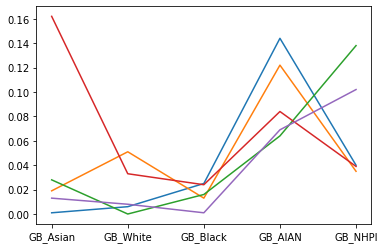

In [49]:
import matplotlib.pyplot as plt
plt.plot(gbdf[:-1].iloc[:,:-1])
# plt.legend(True)

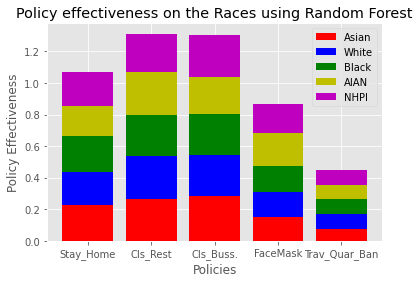

In [145]:
plt.bar(policy,RF_Asian,color='r')
plt.bar(policy,RF_White,bottom=RF_Asian,color='b')
plt.bar(policy,RF_Black,bottom=[RF_Asian[i]+RF_White[i] for i in range(len(RF_Black))],color='g')
plt.bar(policy,RF_AIAN,bottom=[RF_Asian[i]+RF_White[i]+RF_Black[i] for i in range(len(RF_Black))],color='y')
plt.bar(policy,RF_NHPI,bottom=[RF_Asian[i]+RF_White[i]+RF_Black[i]+RF_AIAN[i] for i in range(len(RF_Black))],color='m')
plt.legend(["Asian","White","Black","AIAN","NHPI"])
plt.title("Policy effectiveness on the Races using Random Forest")
plt.xlabel("Policies")
plt.ylabel("Policy Effectiveness")
plt.show()


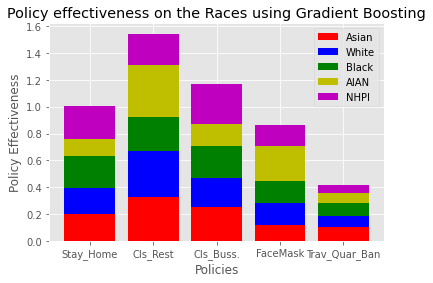

In [142]:
plt.bar(policy,GB_Asian,color='r')
plt.bar(policy,GB_White,bottom=GB_Asian,color='b')
plt.bar(policy,GB_Black,bottom=[GB_Asian[i]+GB_White[i] for i in range(len(GB_Black))],color='g')
plt.bar(policy,GB_AIAN,bottom=[GB_Asian[i]+GB_White[i]+GB_Black[i] for i in range(len(GB_Black))],color='y')
plt.bar(policy,GB_NHPI,bottom=[GB_Asian[i]+GB_White[i]+GB_Black[i]+GB_AIAN[i] for i in range(len(GB_Black))],color='m')
plt.legend(["Asian","White","Black","AIAN","NHPI"])
plt.title("Policy effectiveness on the Races using Gradient Boosting")
plt.xlabel("Policies")
plt.ylabel("Policy Effectiveness")
plt.show()


In [146]:
temp_rf=pd.DataFrame(data=[RF_Asian,RF_White,RF_Black,RF_AIAN,RF_NHPI],index=["RF_Asian","RF_White","RF_Black","RF_AIAN","RF_NHPI"],columns=policy)
temp_rf

,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban
RF_Asian,0.224812,0.265077,0.282316,0.149571,0.078224
RF_White,0.209599,0.273907,0.264282,0.157752,0.094459
RF_Black,0.227421,0.258004,0.254562,0.166186,0.093827
RF_AIAN,0.190734,0.275136,0.234849,0.208997,0.090285
RF_NHPI,0.216859,0.238834,0.266594,0.183109,0.094604


<AxesSubplot:>

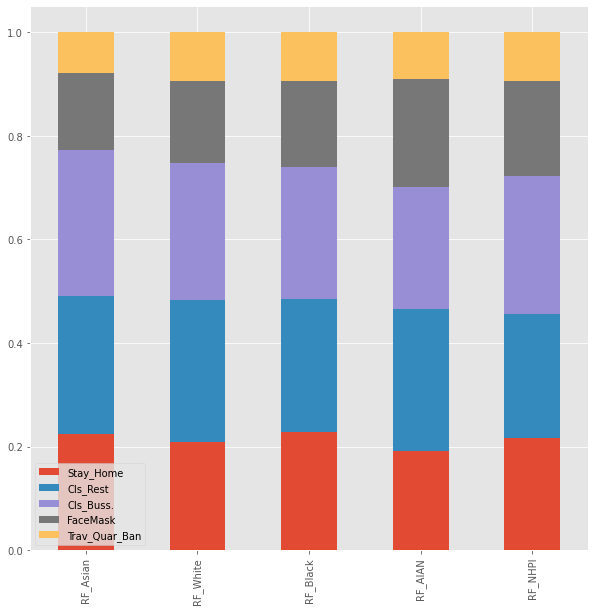

In [159]:
temp_rf.plot(kind="bar",stacked=True,figsize=(10,10))

In [34]:
import pandas as pd
temp_gb=pd.DataFrame(data=[GB_Asian
,GB_White
,GB_Black
,GB_AIAN	
,GB_NHPI],index=["GB_Asian","GB_White","GB_Black","GB_AIAN","GB_NHPI"],columns=policy)
temp_gb

,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban
GB_Asian,0.200797,0.323977,0.252691,0.118534,0.104001
GB_White,0.190880,0.349588,0.212437,0.162175,0.084920
GB_Black,0.239368,0.252595,0.243512,0.167569,0.096956
GB_AIAN,0.128328,0.384892,0.161855,0.256107,0.068818
GB_NHPI,0.248013,0.232104,0.296709,0.159534,0.063640


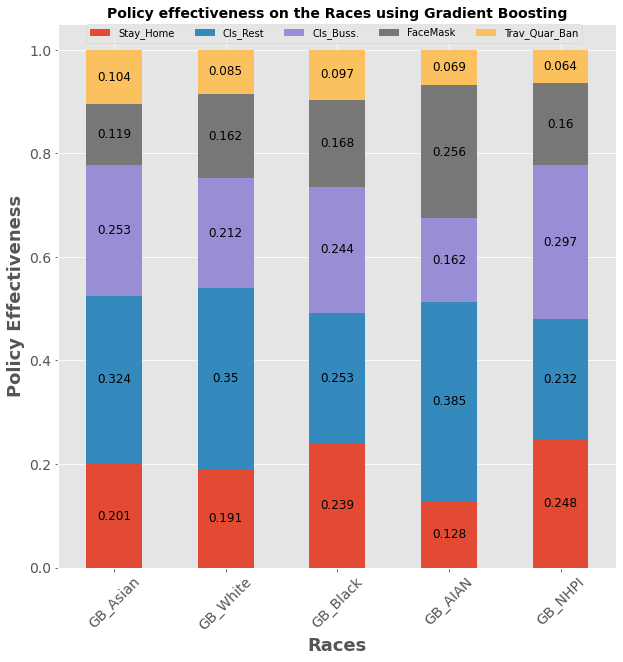

<Figure size 432x288 with 0 Axes>

In [43]:
plt.style.use('ggplot')

ax_gb = temp_gb.plot(kind='bar',stacked=True,figsize=(10,10),rot=45,fontsize=14)

# .patches is everything inside of the chart
for rect in ax_gb.patches:
    # Find where everything is located
    height = rect.get_height().round(3)
    width = rect.get_width().round(3)
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax_gb.text(label_x.round(3), label_y.round(3), label_text, ha='center', va='center', fontsize=12)
    
ax_gb.legend(bbox_to_anchor=(0.05, 1.00), loc='upper left', borderaxespad=0.,ncol=5)    
ax_gb.set_ylabel("Policy Effectiveness", fontsize=18,weight='bold')
ax_gb.set_xlabel("Races", fontsize=18,weight='bold')
plt.title("Policy effectiveness on the Races using Gradient Boosting",fontsize=14,weight='bold')
plt.grid(True)
plt.show()

plt.savefig("race_gb.png")

In [156]:
temp_gb

,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban
GB_Asian,0.200797,0.323977,0.252691,0.118534,0.104001
GB_White,0.190880,0.349588,0.212437,0.162175,0.084920
GB_Black,0.239368,0.252595,0.243512,0.167569,0.096956
GB_AIAN,0.128328,0.384892,0.161855,0.256107,0.068818
GB_NHPI,0.248013,0.232104,0.296709,0.159534,0.063640


In [51]:
plt.style.use('ggplot')

ax_rf = temp_rf.plot(kind='bar',stacked=True,figsize=(10,10))

# .patches is everything inside of the chart
for rect in ax_rf.patches:
    # Find where everything is located
    height = rect.get_height().round(3)
    width = rect.get_width().round(3)
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax_rf.text(label_x.round(3), label_y.round(3), label_text, ha='center', va='center', fontsize=12)
    
ax_rf.legend(bbox_to_anchor=(0.5, 1.00), loc='upper center', borderaxespad=0.3,ncol=5)    
ax_rf.set_ylabel("Policy Effectiveness", fontsize=18)
ax_rf.set_xlabel("Races", fontsize=18)
plt.title("Policy effectiveness on the Races using Random Forest")
plt.show()

plt.savefig("race_rf.png")

NameError: name 'temp_rf' is not defined

In [52]:
gb_country = [round(i,3) for i in [0.20662415, 0.28510733, 0.21638292, 0.19848551, 0.09340009]]
rf_country = [round(i,3) for i in [0.22076113, 0.25715806, 0.25806681, 0.17685803, 0.08715597]]

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
df=pd.DataFrame(data=[rf_country,gb_country],index=["RF","GB"],columns=policy)
df

,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban
RF,0.221,0.257,0.258,0.177,0.087
GB,0.207,0.285,0.216,0.198,0.093


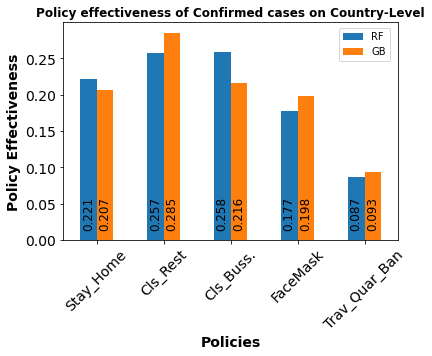

In [18]:
ax1=df.T.plot(kind='bar',rot=45,fontsize=14)
for rec in ax1.patches:
    height= rec.get_height().round(3)
    width = rec.get_width().round(3)
    x=rec.get_x()
    y=rec.get_y()
    label_x = x + width / 2
    label_y = 0.06 #y + height / 2
    label_text = f'{height}'
    if height>0:
        ax1.text(label_x,label_y,label_text,ha='center',va='top',fontsize=12,rotation=90)
    
ax1.legend(bbox_to_anchor=(0.9,0.9), loc='center', borderaxespad=0.)
ax1.set_ylabel("Policy Effectiveness", fontsize=14,weight='bold')
ax1.set_xlabel("Policies", fontsize=14,weight='bold')
plt.title("Policy effectiveness of Confirmed cases on Country-Level",weight='bold',fontsize=12)
plt.show()

In [47]:
gb_death=[round(i,3) for i in [0.30725152, 0.15806256, 0.18431637, 0.21624268, 0.13412687]]
rf_death=[round(i,3) for i in [0.28018098, 0.17253167, 0.20428046, 0.19945049, 0.14355639]]

In [48]:
df_death=pd.DataFrame(data=[rf_death,gb_death],index=["RF","GB"],columns=policy)
df_death

,Stay_Home,Cls_Rest,Cls_Buss.,FaceMask,Trav_Quar_Ban
RF,0.280,0.173,0.204,0.199,0.144
GB,0.307,0.158,0.184,0.216,0.134


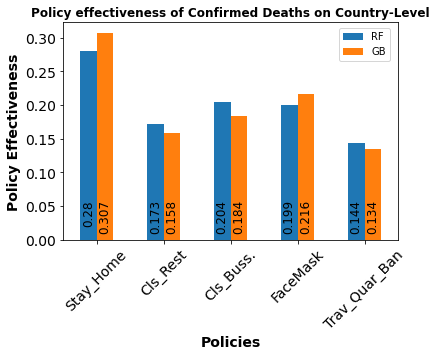

In [24]:
ax2=df_death.T.plot(kind='bar',rot=45,fontsize=14)
for rec in ax2.patches:
    height= rec.get_height().round(3)
    width = rec.get_width().round(3)
    x=rec.get_x()
    y=rec.get_y()
    label_x = x + width / 2
    label_y = 0.06 #y + height / 2
    label_text = f'{height}'
    if height>0:
        ax2.text(label_x,label_y,label_text,ha='center',va='top',fontsize=12,rotation=90)
    
ax2.legend(bbox_to_anchor=(0.9,0.9), loc='center', borderaxespad=0.)
ax2.set_ylabel("Policy Effectiveness", fontsize=14,weight='bold')
ax2.set_xlabel("Policies", fontsize=14,weight='bold')
plt.title("Policy effectiveness of Confirmed Deaths on Country-Level",weight='bold',fontsize=12)
plt.show()

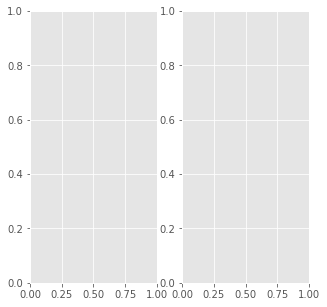

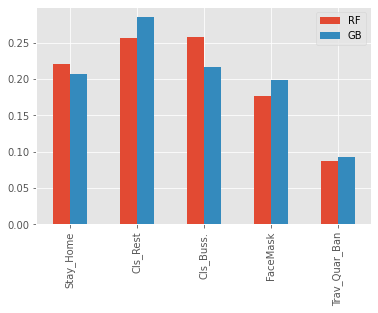

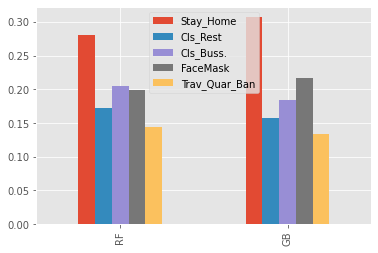